In [174]:
import pandas as pd
import matplotlib.pyplot as plt


In [176]:
df = pd.read_csv('Customers.csv')


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [178]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [179]:
df.loc[df['Profession'].isna()].head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7


In [182]:
df = df.drop(['CustomerID', 'Profession'], axis = 1)

In [183]:
df = pd.get_dummies(df, drop_first = True)

In [184]:
df = df.rename(columns = {'Gender_Male': 'Gender','Spending Score (1-100)': 'Spending Score', 'Annual Income ($)': 'Income'})

In [185]:
x = df[['Age', 'Spending Score', 'Work Experience', 'Family Size', 'Gender']]


In [186]:
y = df[['Income']]

In [51]:
# def clean (df):
#     df = df.drop(['CustomerID', 'Profession'], axis = 1)
#     df = pd.get_dummies(df, drop_first = True)
#     df = df.rename(columns = {'Gender_Male': 'Gender','Spending Score (1-100)': 'Spending Score', 'Annual Income ($)': 'Income'})
#     return df
# df = clean(df)

# ML 

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [187]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)


In [190]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('model', LinearRegression())
])
pip = pipeline.fit(x, y)
y_pred = pip.predict(X_test)
y_pred

In [192]:
mse = mean_squared_error(y_test, y_pred)
mse

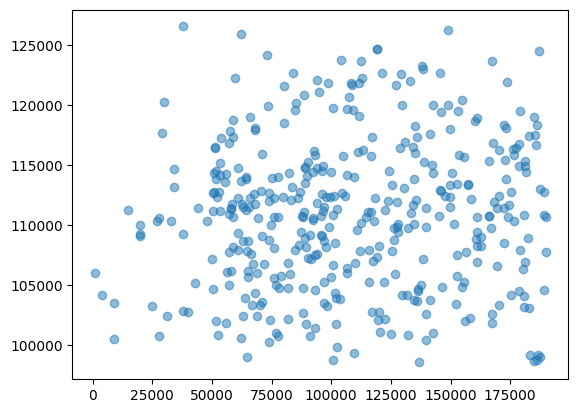

In [160]:
plt.scatter(y_test, y_pred, alpha=0.5)